# [개인 대출 승인 여부 예측 Model]

## 0. Project Summary
1. 사용 Dataset : https://www.kaggle.com/datasets/teertha/personal-loan-modeling(From Kaggle)
2. 사용 Algorithm : XGBoost
3. 훈련정확도 : 99.78% / 테스트정확도 : 98.2%



### 프로젝트 주제 및 알고리즘 선정 계기
* 기말 프로젝트 주제 선정 - 샘플 주제 추천 사례 by ChatGPT (https://chatgpt.com/share/67209327-8170-8002-82a4-f0a66f813209)을 확인하여 보니, 데이터 셋이 표형태이며, 결측치가 적은 구조화된 데이터가 대부분이였음

* 구조화된 데이터의 뛰어난 성능을 보이는 Gradient Boosting Machines 중 XGBoost algorithm을 사용하기로 정함

* GPT 활용내역 내용요약(주제선정)
- 링크(https://chatgpt.com/c/67581a93-222c-8009-8c96-685cc65eea27)

- 질문 : 머신러닝이라는 강좌를 문제중심학습 방식으로 운영할 때, 학생들이 해결해 보기에 적절한 문제들을 추천해줘. 이 때 문제는 Dense Layer를 사용하는 의사결정나무를 사용하는 데 적절한 주제여야 해. 그중에서도 Xgboost를 사용하려고 해. 또한, 가능하면 사용할 공개된 데이터가 있는 제안한 주제들과 그 데이타 링크도 인터넷 상에 공개된 실제 자료의 주소로 함께 알려줘. 주제는 10개 선정해줘.

- 답변 : 문제중심학습(Problem-Based Learning, PBL) 방식으로 머신러닝 강좌를 운영할 때, 학생들이 XGBoost를 활용하여 의사결정나무 기반 모델을 학습하고 적용해볼 수 있는 주제와 관련된 공개 데이터셋을 추천해 드리겠습니다. 각 주제와 데이터셋은 실제 사례를 기반으로 하며, 링크를 통해 직접 접근하실 수 있습니다.

- 선정된 주제: 개인의 재정 정보를 기반으로 대출 승인 여부를 예측합니다.
데이터셋: Personal Loan Model(https://www.kaggle.com/datasets/teertha/personal-loan-modeling)

- Dataset 설명(kaggle 내 설명)
개인 대출 고객을 모색하는 은행의 데이터 
5,000명의 고객을 포함, 데이터에는 여러가지 고객 관련 정보를 포함
csv 형태 파일
데이터 세트에는 빈 값(NaN)이 없음
데이터 세트에는 숫자와 범주형 속성이 혼합되어 있지만 모든 범주형 데이터는 숫자로 표시됨

## 1. Loading the Dataset

### Attribute Information
* ID : Customer ID
* Age : Customer's age in completed years
* Experience : Number of years of professional experience
* Income : Annual income of the customer ($000)
* ZIP Code : Home Address ZIP code.
* Family : Family size of the customer
* CCAvg : Avg. spending on credit cards per month ($000)
* Education : Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional
* Mortgage : Value of house mortgage if any. ($000)
* Personal Loan : Did this customer accept the personal loan offered in the last campaign?
* Securities Account : Does the customer have a securities account with the bank?
* CD Account : Does the customer have a certificate of deposit (CD) account with the bank?
* Online : Does the customer use internet banking facilities?
* CreditCard : Does the customer use a credit card issued by this Bank?

*** Kaggle 에서 Data의 Attribute Information를 확인하고,
'개인 대출 승인 여부' 에 대해서 판단하는 모델을 구축하는 것을 목표로 하고 있기 때문에 Did this customer accept the personal loan offered in the last campaign?이라는 정보를 가지고 있는 "Personal Loan" 속성을 타겟변수로 잡을 것을 확인함.
  
### 라이브러리를 가져온후, Dataset을 Load

In [18]:
# 라이브러리를 불러옴
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
import matplotlib.pyplot as plt

# 랜덤 시드 설정
RANDOM_STATE = 55

# 데이터 로드
file_path = 'Bank_Personal_Loan_Modelling.csv'
df = pd.read_csv(file_path)

# 데이터 출력 
print(df.head())

   ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49     91107       4    1.6          1         0   
1   2   45          19      34     90089       3    1.5          1         0   
2   3   39          15      11     94720       1    1.0          1         0   
3   4   35           9     100     94112       1    2.7          2         0   
4   5   35           8      45     91330       4    1.0          2         0   

   Personal Loan  Securities Account  CD Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1  


## 2. One-hot encoding

* kaggle 내 Dataset 설명을 통하여

데이터 세트에는 빈 값(NaN)이 없음
데이터 세트에는 숫자와 범주형 속성이 혼합되어 있지만 모든 범주형 데이터는 숫자로 표시됨
이라는 사실을 알지만, 

원핫 인코딩으로 해당 정보와 일치하는지 확인

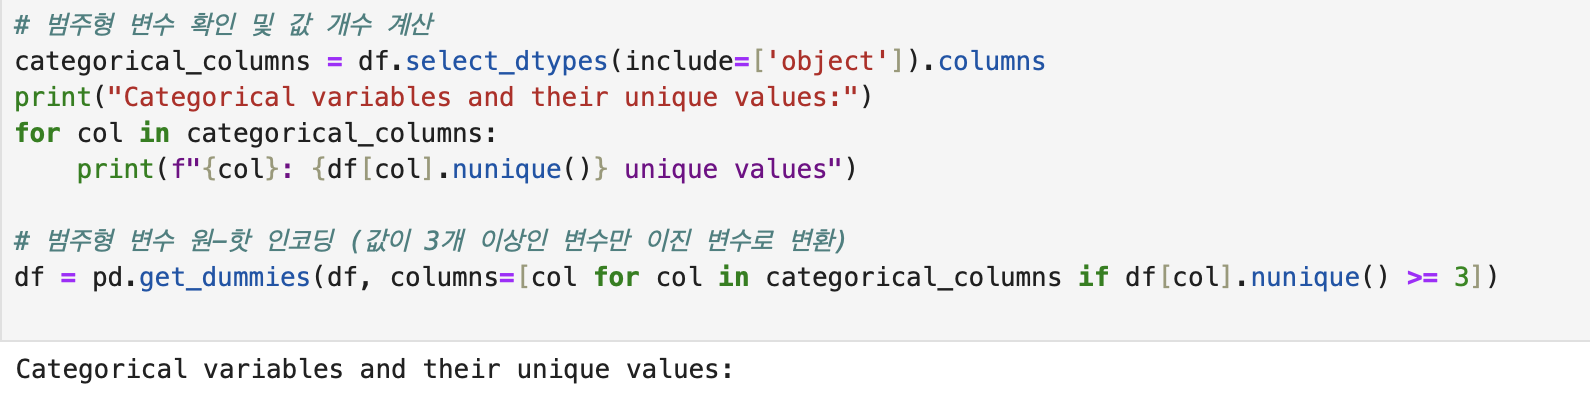
### * 해당 출력을 통해서는 실제 값이 없는 것인지, NaN 값이여서 출력문만 출력되는 것인지 알 수 없음.

* GPT 사용하여 코드 추가
* GPT 활용내역 내용요약(One-hot encoding 시 대상 변수가 없는 경우 코드 작성법)
* 링크 (https://chatgpt.com/c/67581ec9-d9e0-8009-a0db-99fbdfd6fc96)

* 질문 : 파이썬 언어를 활용해서 원핫 인코딩시 원핫인코딩 대상의 변수가 없는 경우 어떤식으로 코드를 작성해야해

* 답변 : 파이썬에서 원핫 인코딩을 수행할 때, 특정 변수가 데이터셋에 없는 경우를 처리하려면 이를 대비한 코드를 작성해야 합니다. 예를 들어, pandas의 get_dummies나 sklearn의 OneHotEncoder를 사용할 때 컬럼이 존재하지 않을 경우 기본값을 추가하는 방법을 활용할 수 있습니다.

(예시코드)

범주형 변수 선택
categorical_columns = df.select_dtypes(include=['object']).columns

print("Categorical variables and their unique values:")
for col in categorical_columns:
    unique_values = df[col].nunique()
    unique_list = df[col].unique()
    print(f"{col}: {unique_values} unique values ({list(unique_list)})")

특정 열이 없으면 추가
target_column = 'D'  # D는 없는 열
if target_column not in df.columns:
    df[target_column] = 'default'  # 기본값 추가
    print(f"Column '{target_column}' added with default value.")

원핫 인코딩 수행
encoded_df = pd.get_dummies(df, columns=[target_column])
print("\nEncoded DataFrame:")
print(encoded_df)


In [19]:
# 범주형 변수 추출
categorical_columns = df.select_dtypes(include=['object']).columns

# 범주형 변수 확인
if len(categorical_columns) == 0:
    print("No categorical variables found.")
else:
    print("Categorical variables and their unique values:")
    for col in categorical_columns:
        unique_values = df[col].nunique()
        print(f"{col}: {unique_values} unique values")

# One-hot encoding 적용여부 확인
if len(categorical_columns) > 0:
    df = pd.get_dummies(df, columns=[col for col in categorical_columns if df[col].nunique() >= 3])
    print("One-hot encoding applied to variables with 3 or more unique values.")
else:
    print("No variables to apply one-hot encoding.")


No categorical variables found.
No variables to apply one-hot encoding.


* One-hot encoding 대상이 없음을 코드를 통해 확인
  
* 이후, 제외할 타겟 변수를 정의한 후, 최종변수를 출력해서 확인해봄


In [20]:
exclude_columns = ['ID', 'ZIP Code'] 
final_variables = [col for col in df.columns if col not in exclude_columns]

print("Final variables for modeling:")
print(final_variables)

print("final_variables_number :")
print(len(final_variables))

Final variables for modeling:
['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Personal Loan', 'Securities Account', 'CD Account', 'Online', 'CreditCard']
final_variables_number :
12


### 변수 2개 삭제후, 최종변수 12개 확인함

## 3. XGBoost

* 타겟변수와 피처를 정의함
 > X : 타겟변수를 제외한 모든열(독립변수로 사용) / Y : 타겟변수

* 대출 승인 여부를 판단하는 모델이기 때문에 해당 정보를 가지고 있는 "Personal Loan: 을 타겟변수, 나머지 변수를 독립변수로 지정함.

* 학습 및 테스트 데이터를 분리함
 > 데이터를 80 : 20 으로 분할
 > 데이터 샘플의 수를 확인함

In [21]:
# 타겟변수와 피처를 정의
X = df[final_variables].drop(columns='Personal Loan')
y = df['Personal Loan']

# 학습 및 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE)

# 학습 및 테스트 샘플의 수 및 비율 확인
print(f'train samples: {len(X_train)}\ntest samples: {len(X_test)}')
print(f'target proportion: {sum(y_train)/len(y_train):.4f}')

train samples: 4000
test samples: 1000
target proportion: 0.0958


* 훈련 세트를 정의 : 80% 학습, 20% 검증

* XGBoost 모델 생성 및 학습(이때, 검증 데이터에서 비용함수가 개선되지 않으면 학습을 중단시키게 함) 후, 최종 모델에 피팅된 트리 수를 확인함

* GPT 활용내역 내용요약(비용함수 개선되지 않으면 학습 중단시키는 방법)

* 링크 (https://chatgpt.com/c/67582267-58a0-8009-aeac-958deab1e4b0)

* 질문 : XGBoost 모델 생성 및 학습시킬때, 검증 데이터에서 비용함수가 개선되지 않으면 학습을 중단시키게 하는 방법을 알려줘

* 답변 : XGBoost 모델 학습 시 검증 데이터의 비용 함수(예: logloss 또는 rmse)가 개선되지 않으면 학습을 조기에 중단하는 방법은 early_stopping_rounds 파라미터를 사용하는 것입니다. 다음은 Python에서 XGBoost를 사용하여 이를 설정하는 방법입니다.

(예시코드)

모델 학습
bst = xgb.train(
    params,
    dtrain,
    num_boost_round=500,           # 최대 부스팅 횟수
    evals=evals,
    early_stopping_rounds=10,      # 조기 중단 기준 (10번 연속 개선 없으면 중단)
    verbose_eval=True              # 학습 과정 출력
)

In [12]:
# 훈련데이터분할(80% 학습용, 20% 검증용)
n = int(len(X_train) * 0.8)
X_train_fit, X_train_eval = X_train[:n], X_train[n:]
y_train_fit, y_train_eval = y_train[:n], y_train[n:]

# XGBoost 모델 생성(조기중단조건포함)
xgb_model = XGBClassifier(n_estimators=500, learning_rate=0.1, random_state=RANDOM_STATE, early_stopping_rounds=50)

# 모델 학습(fit)
xgb_model.fit(
    X_train_fit,
    y_train_fit,
    eval_set=[(X_train_eval, y_train_eval)],
    verbose=True
)

# 최종 피팅된 트리 수 출력
print(f"Number of trees fitted in the final model: {xgb_model.best_iteration}")

[0]	validation_0-logloss:0.28237
[1]	validation_0-logloss:0.24588
[2]	validation_0-logloss:0.21832
[3]	validation_0-logloss:0.19549
[4]	validation_0-logloss:0.17630
[5]	validation_0-logloss:0.15993
[6]	validation_0-logloss:0.14596
[7]	validation_0-logloss:0.13368
[8]	validation_0-logloss:0.12289
[9]	validation_0-logloss:0.11317
[10]	validation_0-logloss:0.10462
[11]	validation_0-logloss:0.09702
[12]	validation_0-logloss:0.09027
[13]	validation_0-logloss:0.08397
[14]	validation_0-logloss:0.07865
[15]	validation_0-logloss:0.07352
[16]	validation_0-logloss:0.06903
[17]	validation_0-logloss:0.06524
[18]	validation_0-logloss:0.06157
[19]	validation_0-logloss:0.05852
[20]	validation_0-logloss:0.05568
[21]	validation_0-logloss:0.05291
[22]	validation_0-logloss:0.05060
[23]	validation_0-logloss:0.04840
[24]	validation_0-logloss:0.04669
[25]	validation_0-logloss:0.04523
[26]	validation_0-logloss:0.04373
[27]	validation_0-logloss:0.04213
[28]	validation_0-logloss:0.04081
[29]	validation_0-loglos

### 학습 및 테스트 후, 모델의 정확도를 출력
- 훈련테이터(X_train)에 대한 모델의 예측결과와 실제 답을(y_train)비교하여 정확도 출력
- 테스트 데이터(X_test)에 대한 모델의 예측 결과와 실제 답(y_test)을 비교하여 정확도 출력

In [13]:
# 훈련 데이터에 대한 정확도 출력
print(f"Metrics train:\n\tAccuracy score: {accuracy_score(xgb_model.predict(X_train), y_train):.4f}")

# 테스트 데이터에 대한 정확도 출력
print(f"Metrics test:\n\tAccuracy score: {accuracy_score(xgb_model.predict(X_test), y_test):.4f}")

Metrics train:
	Accuracy score: 0.9978
Metrics test:
	Accuracy score: 0.9820


### 훈련정확도 : 99.78%
### 테스트정확도 : 98.2%

* 훈련 데이터와 테스트 데이터의 정확도 차이 : 1.58%
> 모델이 과적합되지 않고, 일반화가 잘되고 있다고 판단

## 4. Feature Importance

*  GPT 활용내역 내용요약(xgboost 알고리즘을 통해 모델을 구축한 후, 추가적으로 진행할 코드)

* 링크(https://chatgpt.com/c/675824d1-c9d4-8009-8cc5-e14eb6265c99)

* 질문 : 여러 변수가 있는 데이터를 xgboost 알고리즘을 통해 모델을 구축한 후, 훈련데이터와 테스트 데이터의 정확도 파악까지 완료했어. 이후에 추가적으로 진행하면 좋은 코드 있을까?

* 답변 : XGBoost 모델을 구축하고 훈련 데이터와 테스트 데이터의 정확도를 확인했다면, 이후에는 모델을 개선하거나 추가적인 분석을 진행할 수 있는 다양한 방법이 있습니다. 아래에 추천하는 추가 작업과 이에 대한 코드를 제안합니다..

Feature Importance 분석
특성의 중요도를 시각화하여 모델이 어떤 변수를 중요하게 생각하는지 확인합니다.

(예시코드)

from xgboost import plot_importance

import matplotlib.pyplot as plt

Feature importance 시각화

plot_importance(model, importance_type='weight')  # 또는 'gain', 'cover' 사용 가능
plt.show()

* 여러개의 제안 중, 가장 중요한 특징이 무엇인지를 확인하는 Feature Importance를 코드로 구현함

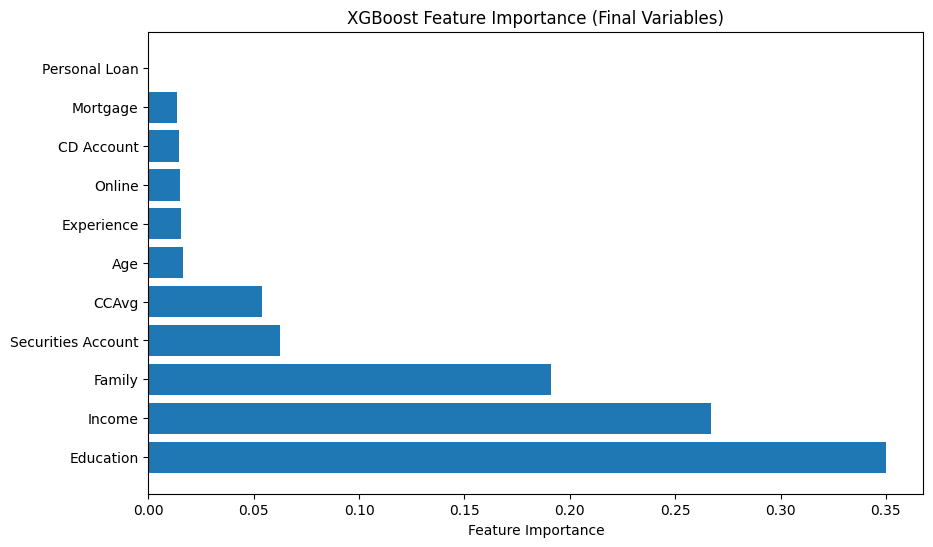

In [17]:
# feature_importances추출
feature_importances = xgb_model.feature_importances_

# 중요도 정렬
sorted_idx = np.argsort(feature_importances)[::-1]

# 막대 그래프 시각화
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), [final_variables[i] for i in sorted_idx])
plt.xlabel('Feature Importance')
plt.title('XGBoost Feature Importance (Final Variables)')
plt.show()

* XGBoost 모델이 가장 중요한 특성으로 간주하는 변수는 'Education' 임을 확인

## 5. GPT 총 활용내역 및 링크
1. 주제선정 (https://chatgpt.com/c/67581a93-222c-8009-8c96-685cc65eea27)
2. One-hot encoding 시 대상 변수가 없는 경우 코드 작성법 (https://chatgpt.com/c/67581ec9-d9e0-8009-a0db-99fbdfd6fc96)
3. 비용함수 개선되지 않으면 학습 중단시키는 방법 (https://chatgpt.com/c/67582267-58a0-8009-aeac-958deab1e4b0)
4. xgboost 알고리즘을 통해 모델을 구축한 후, 추가적으로 진행할 코드(https://chatgpt.com/c/675824d1-c9d4-8009-8cc5-e14eb6265c99)